# Logistic Regression

Step 1: Data Pre-Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# Only keep close columns 
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)

In [4]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Buy_Sell
Date,,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400,1
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200,1
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300,1
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100,-1
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700,-1


In [5]:
dataset['Buy_Sell'] = dataset['Buy_Sell'].astype('int')

In [6]:
# Define X
X = np.asarray(dataset[['Open', 'High', 'Low', 'Adj Close', 'Volume']])
X[0:5]

array([[3.85000e+00, 3.98000e+00, 3.84000e+00, 3.95000e+00, 2.05484e+07],
       [3.98000e+00, 4.00000e+00, 3.88000e+00, 4.00000e+00, 2.28872e+07],
       [4.01000e+00, 4.18000e+00, 3.99000e+00, 4.13000e+00, 4.23983e+07],
       [4.19000e+00, 4.25000e+00, 4.11000e+00, 4.18000e+00, 4.29321e+07],
       [4.23000e+00, 4.26000e+00, 4.14000e+00, 4.18000e+00, 3.06787e+07]])

In [7]:
# Define y
y = np.asarray(dataset['Buy_Sell'])
y[0:5]

array([ 1,  1,  1, -1, -1])

Step 2: Normalize Dataset

In [8]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.64855413, -0.63841038, -0.63386523, -0.62754122, -0.50102319],
       [-0.62190649, -0.63439667, -0.62549188, -0.6173066 , -0.43332499],
       [-0.61575704, -0.59827322, -0.60246516, -0.59069658,  0.13143746],
       [-0.57886031, -0.58422521, -0.57734511, -0.58046196,  0.14688867],
       [-0.57066103, -0.58221835, -0.57106509, -0.58046196, -0.20779457]])

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (879, 5) (879,)
Test set: (293, 5) (293,)


Step 2: Logistic Regression Model

In [10]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Step 3: Prediction

In [11]:
# Predicting the Test set results
yhat = LR.predict(X_test)
yhat

array([ 1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,
       -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1,
        1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,
        1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,
        1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,
        1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1

In [12]:
# predict_proba is returns of estimates for all classes, ordered by the label of classes. 
# The first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X)
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.45964182, 0.54035818],
       [0.46443403, 0.53556597],
       [0.50397715, 0.49602285],
       [0.51185249, 0.48814751],
       [0.51204791, 0.48795209],
       [0.52149107, 0.47850893],
       [0.46375946, 0.53624054],
       [0.49262736, 0.50737264],
       [0.50968857, 0.49031143],
       [0.45729166, 0.54270834],
       [0.50318484, 0.49681516],
       [0.48929741, 0.51070259],
       [0.50852743, 0.49147257],
       [0.48200559, 0.51799441],
       [0.51217314, 0.48782686],
       [0.47065543, 0.52934457],
       [0.45360871, 0.54639129],
       [0.50709486, 0.49290514],
       [0.46592349, 0.53407651],
       [0.50685718, 0.49314282],
       [0.50733108, 0.49266892],
       [0.50719419, 0.49280581],
       [0.50449033, 0.49550967],
       [0.50648358, 0.49351642],
       [0.46396373, 0.53603627],
       [0.51023834, 0.48976166],
       [0.50762412, 0.49237588],
       [0.45945976, 0.54054024],
       [0.47156297, 0.52843703],
       [0.50757982, 0.49242018],
       [0.

Step 4: Evaluating The Predection

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.5460750853242321

In [14]:
# Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[74  0]
 [ 0  0]]


Confusion matrix, without normalization
[[74  0]
 [ 0  0]]


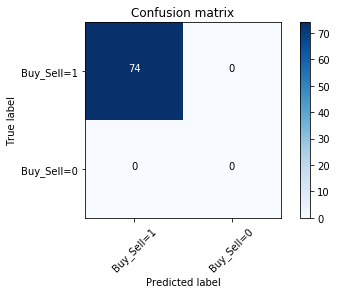

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Buy_Sell=1','Buy_Sell=0'],normalize= False,  title='Confusion matrix')

In [16]:
print (classification_report(y_test, yhat))

             precision    recall  f1-score   support

         -1       0.59      0.54      0.56       160
          1       0.50      0.56      0.53       133

avg / total       0.55      0.55      0.55       293



Accuracy is score to see how well your model is.    
Precision is how accurate your model is and is represent the positive predictive value (PPV).    
Recall represent the true positive rate or sensitivity. 



Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

Recall is true positive rate. It is defined as: Recall =  TP / (TP + FN)


In [22]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, yhat))
print("Precision:",metrics.precision_score(y_test, yhat))
print("Recall:",metrics.recall_score(y_test, yhat))

Accuracy: 0.5460750853242321
Precision: 0.5
Recall: 0.556390977443609


In [18]:
# Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6949588373995693

In [19]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.70


Receiver Operating Characteristic(ROC) curve is shows the connection/trade-off between sensitivity and specificity for every possible cut-off for a test or a combination of tests. In addition, the curve is to compare two operating characteristics  true positive rate (TPR) against the false positive rate (FPR). 
Area Under Curve (AUC) is area under the ROC curve that represent the binary classification. 

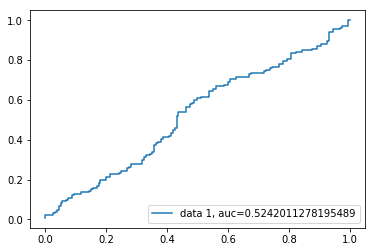

In [25]:
y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()